In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
__author__ = "Gökhan Özeloğlu"
__date__ = "05.01.2020"

In [0]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [0]:
path = "/content/drive/My Drive/ML_Term_Project/"
data_df = pd.read_csv(path + "dataset_1.csv")

In [4]:
data_df.head()

,Unnamed: 0,Unnamed: 0.1,count,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,0,0,3,2,!!! As a woman you shouldn't complain about cl...
1,1,1,3,0,3,0,1,!!!!! boy dats cold...tyga dwn bad for cuffin ...
2,2,2,3,0,3,0,1,!!!!!!! Dawg!!!! You ever fuck a bitch and she...
3,3,3,3,0,2,1,1,!!!!!!!!! she look like a tranny
4,4,4,6,0,6,0,1,!!!!!!!!!!!!! The shit you hear about me might...


In [5]:
# Unneeded columns are dropped
data_df = data_df.drop(["Unnamed: 0", "Unnamed: 0.1", "count", "hate_speech", "offensive_language", "neither"], axis=1)
data_df.head()

,class,tweet
0,2,!!! As a woman you shouldn't complain about cl...
1,1,!!!!! boy dats cold...tyga dwn bad for cuffin ...
2,1,!!!!!!! Dawg!!!! You ever fuck a bitch and she...
3,1,!!!!!!!!! she look like a tranny
4,1,!!!!!!!!!!!!! The shit you hear about me might...


In [6]:
data_df.fillna("")

,class,tweet
0,2,!!! As a woman you shouldn't complain about cl...
1,1,!!!!! boy dats cold...tyga dwn bad for cuffin ...
2,1,!!!!!!! Dawg!!!! You ever fuck a bitch and she...
3,1,!!!!!!!!! she look like a tranny
4,1,!!!!!!!!!!!!! The shit you hear about me might...
...,...,...
24778,1,you's a muthaf***in lie right! His TL is trash...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [0]:
def feature_extract(text, stop_word=True, n_gram=(1, 1)):

    # If stop words want to be excluded.
    if stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram, stop_words="english")
        tf_idf.fit_transform(text)

        X = tf_idf.transform(text)
        
    # If stop words want to be included
    if not stop_word:
    
        tf_idf = TfidfVectorizer(ngram_range=n_gram)
        tf_idf.fit_transform(text)

        X = tf_idf.transform(text)
        
    return X

In [0]:
"""
@:param range_list represents x-axis values. If your x-axis values are in (1, 20) range,
plot's x-axis's in (1, 20) range.
@:param value_list represents accuracy values
@:param title_str is your plot's title. It must be in string type. 
@:param x_label_str is your x-axis title. For example, 'C values'
@:param y_label_str is your y-axis title. For example, 'Accuracies'
"""

def draw_plot(range_list, value_list, title_str, x_label_str, y_label_str):

    plt.plot(range_list, value_list, color="b", linestyle="dashed", marker="o", markerfacecolor="r")
    plt.title(title_str)
    plt.xlabel(x_label_str)
    plt.ylabel(y_label_str)
    plt.show()

In [0]:
y = []
for label in data_df["class"]:
    if label == 1 or label == 0:
        y.append(1)
    else:
        y.append(0)

In [0]:
X = data_df['tweet'].values.astype('U')
#y = data_df["class"].values.astype('U')
X = feature_extract(X)

In [11]:
len(data_df), len(y)

(24783, 24783)

In [12]:
c_acc_list = []
for c in range(1, 21):
    clf = LogisticRegression(C=c, solver="liblinear", multi_class="ovr", random_state=42)
    scores = cross_val_score(clf, X, y, cv=10)
    c_acc_list.append(scores.mean())
    print("Accuracy C:", c, ": ", scores.mean())

Accuracy C: 1 :  0.935360124317878
Accuracy C: 2 :  0.9423808742427513
Accuracy C: 3 :  0.9449229866634369
Accuracy C: 4 :  0.9453266030296135
Accuracy C: 5 :  0.9451652476443773
Accuracy C: 6 :  0.9450843908850486
Accuracy C: 7 :  0.9447212598743082
Accuracy C: 8 :  0.9448018724517585
Accuracy C: 9 :  0.9445194516912198
Accuracy C: 10 :  0.9444790477297434
Accuracy C: 11 :  0.9441965781328291
Accuracy C: 12 :  0.9437930919969878
Accuracy C: 13 :  0.9436317366117517
Accuracy C: 14 :  0.943510703794033
Accuracy C: 15 :  0.943308977004904
Accuracy C: 16 :  0.9431072176581916
Accuracy C: 17 :  0.9429457646002042
Accuracy C: 18 :  0.943066813696715
Accuracy C: 19 :  0.9427439889746999
Accuracy C: 20 :  0.9423808254063758


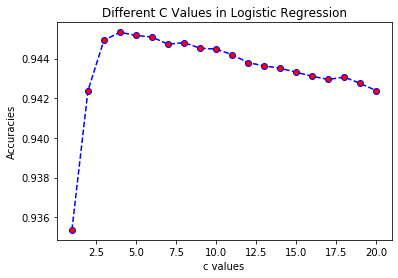

In [13]:
draw_plot(range(1, 21), c_acc_list, "Different C Values in Logistic Regression", "c values", "Accuracies")

In [14]:
c_val = max(c_acc_list)
c = c_acc_list.index(c_val)
print(c)
c += 1
print(c)


3
4


In [15]:
"""for n_gram in [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]:
    for stop_word in [True, False]:
        X = data_df['tweet'].values.astype('U')
        X = feature_extract(X, stop_word=stop_word, n_gram=n_gram)

        clf = LogisticRegression(C=c, solver="liblinear", multi_class="ovr", random_state=42)
        scores = cross_val_score(clf, X, y, cv=10)
        if stop_word:
            print("Accuracy without stopwords", n_gram, ":" , scores.mean())
        else:
            print("Accuracy with stopwords", n_gram, ":" , scores.mean())"""

Accuracy without stopwords (1, 1) : 0.9453266030296135
Accuracy with stopwords (1, 1) : 0.9439142550450417
Accuracy without stopwords (2, 2) : 0.8435223105726519
Accuracy with stopwords (2, 2) : 0.8516328116631684
Accuracy without stopwords (3, 3) : 0.8342413317874993
Accuracy with stopwords (3, 3) : 0.834846593548845
Accuracy without stopwords (4, 4) : 0.8337167314399796
Accuracy with stopwords (4, 4) : 0.8340799112870958
Accuracy without stopwords (5, 5) : 0.8327886449566186
Accuracy with stopwords (5, 5) : 0.8337974742477652


In [16]:
acc_with_stop = []
acc_wout_stop = []
for n_gram in [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5)]:
    for stop_word in [True, False]:
        X = data_df['tweet'].values.astype('U')
        X = feature_extract(X, stop_word=stop_word, n_gram=n_gram)

        clf = LogisticRegression(C=c, solver="liblinear", multi_class="ovr", random_state=42)
        scores = cross_val_score(clf, X, y, cv=10)
        if stop_word:
            acc_wout_stop.append(scores.mean())
            print("Accuracy without stopwords", n_gram, ":" , scores.mean())
        else:
            acc_with_stop.append(scores.mean())
            print("Accuracy with stopwords", n_gram, ":" , scores.mean())

Accuracy without stopwords (1, 1) : 0.9453266030296135
Accuracy with stopwords (1, 1) : 0.9439142550450417
Accuracy without stopwords (2, 2) : 0.8435223105726519
Accuracy with stopwords (2, 2) : 0.8516328116631684
Accuracy without stopwords (3, 3) : 0.8342413317874993
Accuracy with stopwords (3, 3) : 0.834846593548845
Accuracy without stopwords (4, 4) : 0.8337167314399796
Accuracy with stopwords (4, 4) : 0.8340799112870958
Accuracy without stopwords (5, 5) : 0.8327886449566186
Accuracy with stopwords (5, 5) : 0.8337974742477652


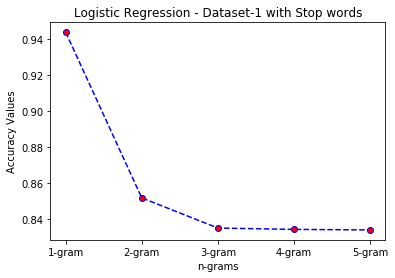

In [17]:
n_grams = ["1-gram", "2-gram", "3-gram", "4-gram", "5-gram"]
draw_plot(n_grams, acc_with_stop, "Logistic Regression - Dataset-1 with Stop words", "n-grams", "Accuracy Values")

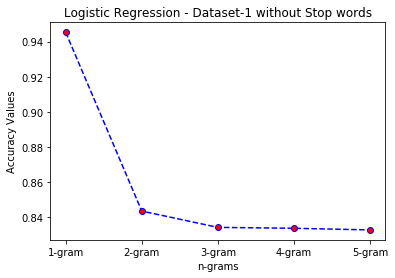

In [19]:
draw_plot(n_grams, acc_wout_stop, "Logistic Regression - Dataset-1 without Stop words", "n-grams", "Accuracy Values")